# New Section

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping


# Define the path to the dataset directory
data_dir = "/content/drive/MyDrive/dataset_iacv/asl_alphabet_train/asl_alphabet_train"

# Define the list of labels
labels = sorted(os.listdir(data_dir))

# Define image dimensions
img_width, img_height = 64, 64

# Define batch size
batch_size = 128

# Define data generator with augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30, # increase rotation range since hand signs can have more variation in orientation
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    brightness_range=[0.4, 1.2],
    shear_range=0.2,
    channel_shift_range=50.0,
    horizontal_flip=True,
    vertical_flip=True, # add vertical flip since hand signs can be mirrored and inverted
    fill_mode='nearest', # use nearest fill mode since hand signs can have sharp edges
    validation_split=0.2)



# Load the images and their corresponding labels using generator
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')

# Define the CNN model
model = Sequential()

model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(img_width, img_height, 3)))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation="relu", padding="same"))
model.add(Conv2D(64, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation="relu", padding="same"))
model.add(Conv2D(128, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(256, (3, 3), activation="relu", padding="same"))
model.add(Conv2D(256, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(1024, activation="relu"))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Dense(256, activation="relu"))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Dense(len(labels), activation="softmax"))

# Compile the model

model.compile(optimizer=keras.optimizers.Adam(lr=0.00001), loss="categorical_crossentropy", metrics=["accuracy"])

train_loss = []
train_acc = []
val_loss = []
val_acc = []

def plot_training_history(epoch, logs):
    train_loss.append(logs['loss'])
    train_acc.append(logs['accuracy'])
    val_loss.append(logs['val_loss'])
    val_acc.append(logs['val_accuracy'])

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    ax1.plot(train_loss, label='Training Loss')
    ax1.plot(val_loss, label='Validation Loss')
    ax1.set_title('Training and Validation Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()

    ax2.plot(train_acc, label='Training Accuracy')
    ax2.plot(val_acc, label='Validation Accuracy')
    ax2.set_title('Training and Validation Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend()

    plt.show()

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
model_checkpoint = ModelCheckpoint('checkpoint.h5', save_best_only=True)
plot_callback = keras.callbacks.LambdaCallback(on_epoch_end=plot_training_history)

history = model.fit(train_generator,
                    steps_per_epoch=train_generator.n // batch_size,
                    epochs=5,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.n // batch_size,
                    callbacks=[early_stopping, model_checkpoint, plot_callback],
                    verbose=2)

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(validation_generator)
print(f'Test Loss: {test_loss:.3f}, Test Accuracy: {test_acc:.3f}')



In [ ]:
model.save('CNN_Model.h5')

In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from keras.models import load_model
model = load_model('/content/CNN_Model.h5')

In [ ]:
import cv2
import numpy as np

In [ ]:
image = cv2.imread("/content/V.jpeg")
resized_img = cv2.resize(image, (64, 64))
np_img = np.array(resized_img)


In [ ]:
np_img.shape

(64, 64, 3)

In [ ]:
np_img = np_img/255
input = np.array([np_img])

In [ ]:
prediction = model.predict(input)

1/1 [==============================] - 0s 150ms/step


In [ ]:
prediction

array([[1.1094685e-05, 1.2548616e-05, 3.8117752e-05, 5.5936166e-06,
        2.4424950e-05, 2.3391822e-05, 8.8569850e-06, 2.1196409e-05,
        2.0231484e-05, 2.8086761e-05, 1.2251202e-04, 2.4127407e-05,
        7.6953029e-06, 7.0691436e-05, 1.0085029e-05, 3.5108587e-05,
        6.1482126e-05, 2.1017232e-04, 4.8121633e-06, 7.5993739e-05,
        2.7020085e-06, 7.2404309e-06, 3.3681761e-06, 3.8536646e-06,
        2.2602970e-04, 9.9886572e-01, 7.8360627e-06, 2.5932664e-05,
        4.1087060e-05]], dtype=float32)

In [ ]:
class_pred=np.argmax(prediction,axis=-1)
class_pred


array([25])

In [ ]:
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'DEL', 'NOTHING', 'SPACE']
class_names[np.argmax(prediction)]

'Z'

# New Model

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import utils, callbacks
from keras.applications.vgg16 import VGG16
from keras.layers import Flatten, Dense, Dropout, BatchNormalization, LeakyReLU
from keras.optimizers import Adam
from keras.losses import CategoricalCrossentropy
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
gen = ImageDataGenerator(rescale=1./255, validation_split=0.1)
train = gen.flow_from_directory("/content/drive/MyDrive/dataset4/asl_alphabet_train",
                                                            target_size=(64, 64), subset="training",batch_size=256)
val = gen.flow_from_directory("/content/drive/MyDrive/dataset4/asl_alphabet_train",
                                                            target_size=(64, 64), subset="validation",batch_size=256)

Found 18058 images belonging to 29 classes.
Found 1992 images belonging to 29 classes.


In [ ]:
model = keras.Sequential()
model.add(VGG16(weights="imagenet",input_shape=(64,64,3),include_top=False))
model.add(Flatten())
model.add(Dense(512))
model.add(BatchNormalization())
model.add(LeakyReLU(0.2))
model.add(Dropout(0.3))
model.add(Dense(512))
model.add(BatchNormalization())
model.add(LeakyReLU(0.2))
model.add(Dropout(0.3))
model.add(Dense(29,activation="softmax"))

58889256/58889256 [==============================] - 2s 0us/step


In [ ]:
opt = Adam(0.00001)
loss = CategoricalCrossentropy()

In [ ]:
model.compile(optimizer=opt,loss=loss,metrics=['accuracy'])

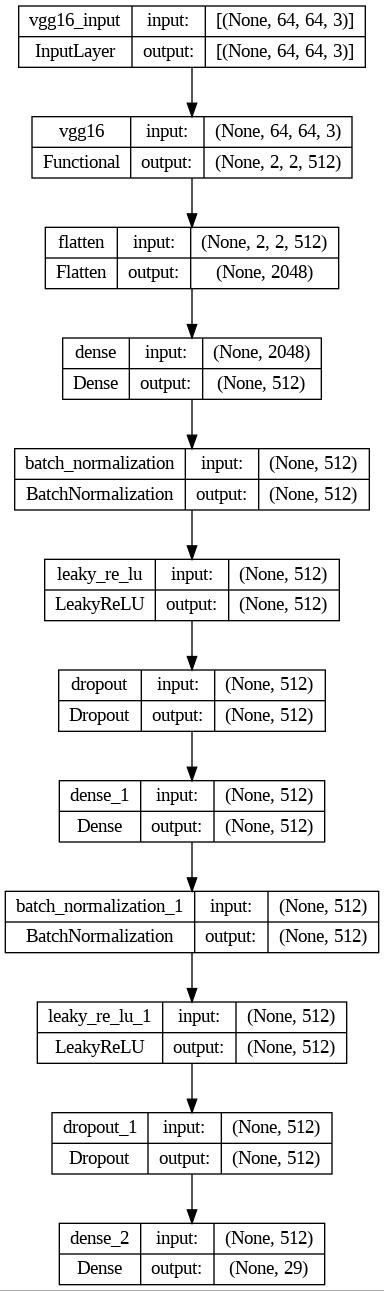

In [ ]:
dot_img_file = '/content/C_test.jpg'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

In [ ]:
earlystopping = callbacks.EarlyStopping(monitor="val_loss", mode="min",
                                        patience=5, restore_best_weights = True)

In [ ]:
history = model.fit(train,validation_data = val,epochs = 20, shuffle = True,verbose = 1, callbacks = [earlystopping])

In [ ]:
import matplotlib.pyplot as plt

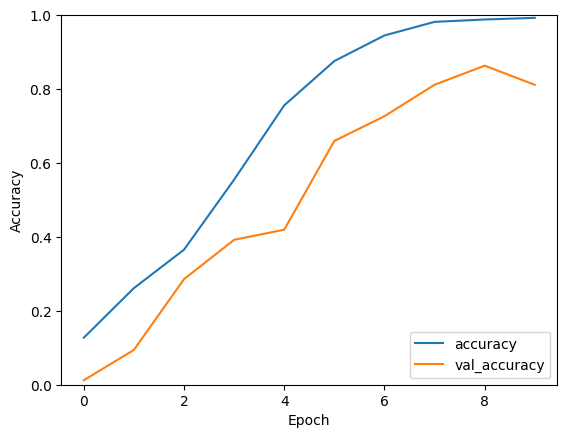

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

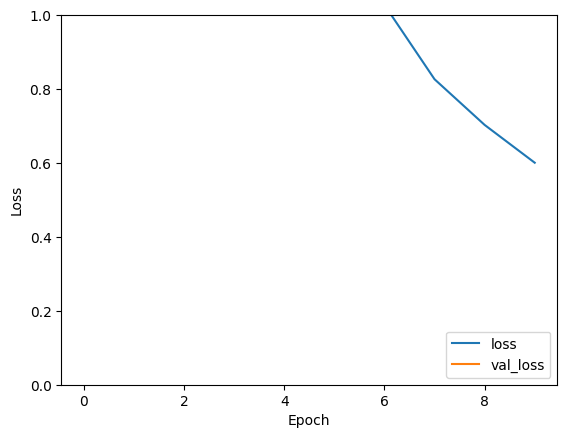

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='lower right')

In [ ]:
test = ImageDataGenerator(rescale=1./255).flow_from_directory("/content/drive/MyDrive/dataset_iacv/asl_alphabet_train/asl_alphabet_train", target_size=(64, 64), class_mode=None)

Found 3290 images belonging to 29 classes.


In [ ]:
test = ImageDataGenerator(rescale=1./255).flow_from_directory("/content/drive/MyDrive/test", target_size=(64, 64), class_mode=None)

Found 0 images belonging to 0 classes.


In [ ]:
import cv2
import numpy as np

In [ ]:
image = cv2.imread("/content/A.jpeg")
resized_img = cv2.resize(image, (64, 64))
np_img = np.array(resized_img)


In [ ]:
np_img.shape

(64, 64, 3)

In [ ]:
np_img = np_img/255
input = np.array([np_img])

In [ ]:
prediction = model.predict(input)

1/1 [==============================] - 0s 21ms/step


In [ ]:
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'DEL', 'NOTHING', 'SPACE']
class_names[np.argmax(prediction)]

'Z'